In [1]:
clean_up=True # removes gams-related files in work-folder if true
%run StdPackages.ipynb
os.chdir(py['main'])
import Invest, ReadData, ShockFunction
os.chdir(curr)
data_folder = os.getcwd()+'\\Data\\IO'
gams_folder = os.getcwd()+'\\gamsmodels\\Itory'

The file_gams_py_gdb0.gdx is still active and was not deleted.
The file_gams_py_gdb1.gdx is still active and was not deleted.


# Investment sector with inventory sector

To account for inventory investments in data a sector is included to handle this. This sector is very simple:
* The sector demands final goods (a,b,a_F,b_F), but produces no outputs.
* There are still some taxes included from this sector; these are accounted for by defining the difference between the price before and after taxes for the inputs they use.

The current module does not have a proper theory of inventory investments underlying it; thus the investment demand/supply are modelled as simple AR(1) series converging on no investments. The demand for inventory goods are defined as: 
$$\begin{align}
    qD[t,s,n]  = (0,9) qD[t-1,s,n]
\end{align}$$
defined for $t\in\lbrace tx0E\rbrace $, $(s,n)\in\lbrace itoryD[s,n]\rbrace$.

Beyond this model for the demand for inventory goods, the sector itself works as the other investment sectors: The sector demands goods defined by some nesting tree.

In [2]:
dsheets = {'Production_v': data_folder+'\\IO_v.xlsx', 'Production_p': data_folder+'\\IO_p.xlsx'}
GE_data = ReadData.read_data.main(dsheets,name='GE_data',components=['domstic','trade','HH','tax','invest'],balanced_data_check=False)
tindex = range(1,4)

Keep investment sectors, including the inventory sector:

Inventory demand is simple to set up:

In [3]:
newdb = DataBase.GPM_database()
for sym in ('n','s','itoryD'):
    newdb[sym] = GE_data.get(sym)

In [4]:
gm_itory = Invest.itoryD(work_folder=work_folder,databases=[newdb],gs_vals={'t': tindex},**{'data_folder':gams_folder,'name':'itsector'})
gm_itory.write_and_run(kwargs_init={'check_variables':True})

Export as pickle:

In [5]:
db = gm_itory.model_instances['baseline'].out_db 
[db.series.__delitem__(sym) for sym in db.symbols if sym not in gm_itory.model.database.symbols];
gm_itory.model.database.merge_dbs(gm_itory.model.database,db,'second')
gm_itory.export(name='itory',repo = os.getcwd()+'\\gamsmodels\\GE')

'C:\\Users\\sxj477\\Documents\\GitHub\\GPM_v4\\examples\\gamsmodels\\GE\\itory'

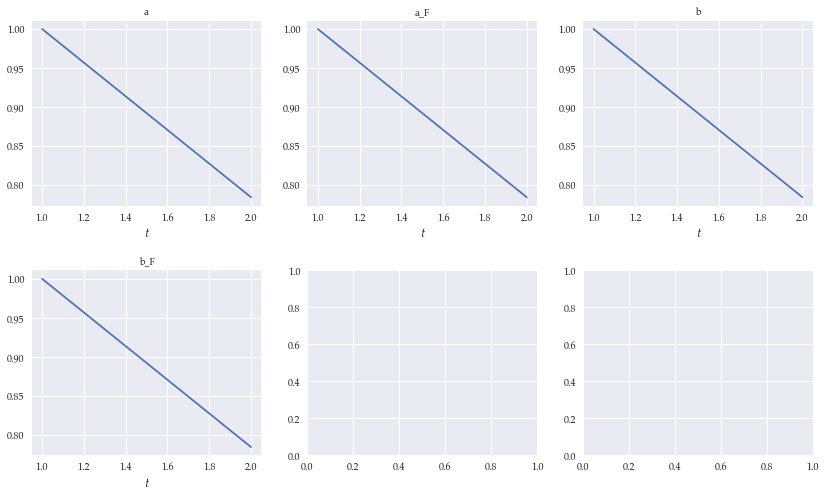

In [6]:
plot_series(gm_itory.model_instances['baseline'].out_db.get('qD').xs('itory',level='s').unstack())